In [66]:
# Import Library
import numpy as np  
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

# Data Splitting
from sklearn.model_selection import train_test_split 

# Scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# Encoding
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder, OrdinalEncoder

# Missing Values
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer

# Binning
from sklearn.preprocessing import KBinsDiscretizer

# Polynomial Features
from sklearn.preprocessing import PolynomialFeatures

# Column Transfornmer
from sklearn.compose import ColumnTransformer

# Pipeline
from sklearn.pipeline import Pipeline

# Cross Validation
from sklearn.model_selection import cross_val_score

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import KFold

# Modeling
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import  KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression

# Joblib
import joblib

# SHAP
import shap

# PDP
from sklearn.inspection import PartialDependenceDisplay

# Metrics
from sklearn.metrics import get_scorer_names
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, mean_absolute_percentage_error, r2_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier 

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier

from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV, train_test_split, StratifiedKFold
from sklearn.metrics import classification_report, f1_score
from sklearn.metrics import confusion_matrix, recall_score, fbeta_score, make_scorer

> # **Background & Context**

> **Background**

> **Problem Statements**

> **Project Objectives**

> **Stakeholders**

> **Features**

> # **Data Loading**

In [67]:
df = pd.read_csv('data_ecommerce_customer_churn.csv')
df.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


In [68]:
df_copy = df.copy()
df_copy.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


> # **EDA & Data Cleaning**

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB


In [70]:
df.shape

(3941, 11)

In [71]:
df.isna().sum()

Tenure                      194
WarehouseToHome             169
NumberOfDeviceRegistered      0
PreferedOrderCat              0
SatisfactionScore             0
MaritalStatus                 0
NumberOfAddress               0
Complain                      0
DaySinceLastOrder           213
CashbackAmount                0
Churn                         0
dtype: int64

In [72]:
df.columns

Index(['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered',
       'PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus',
       'NumberOfAddress', 'Complain', 'DaySinceLastOrder', 'CashbackAmount',
       'Churn'],
      dtype='object')

In [73]:
cat_cols = ['NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus', 'Complain', 'Churn', 'NumberOfAddress']
cat_cols

['NumberOfDeviceRegistered',
 'PreferedOrderCat',
 'SatisfactionScore',
 'MaritalStatus',
 'Complain',
 'Churn',
 'NumberOfAddress']

In [74]:
num_cols = ['Tenure', 'WarehouseToHome', 'DaySinceLastOrder', 'CashbackAmount']
num_cols

['Tenure', 'WarehouseToHome', 'DaySinceLastOrder', 'CashbackAmount']

In [75]:
column_names = list(df.columns)

unique_values = []
for column in df.columns:
    unique_values.append(df[column].unique())

unique_values_df = pd.DataFrame({
    'Column Name': column_names,
    'Unique Values': unique_values
})

pd.set_option('display.max_colwidth', None)
unique_values_df

,Column Name,Unique Values
0,Tenure,"[15.0, 7.0, 27.0, 20.0, 30.0, 1.0, 11.0, 17.0, 6.0, 16.0, 10.0, nan, 8.0, 19.0, 0.0, 3.0, 5.0, 9.0, 18.0, 12.0, 24.0, 4.0, 61.0, 25.0, 13.0, 14.0, 2.0, 21.0, 29.0, 26.0, 23.0, 31.0, 22.0, 28.0, 51.0, 60.0, 50.0]"
1,WarehouseToHome,"[29.0, 25.0, 13.0, 15.0, 16.0, 11.0, 12.0, 7.0, 26.0, 20.0, 14.0, 8.0, 21.0, 22.0, 27.0, 18.0, 33.0, 9.0, 17.0, nan, 6.0, 31.0, 28.0, 10.0, 19.0, 32.0, 23.0, 30.0, 35.0, 34.0, 24.0, 5.0, 36.0, 127.0]"
2,NumberOfDeviceRegistered,"[4, 3, 6, 2, 5, 1]"
3,PreferedOrderCat,"[Laptop & Accessory, Mobile, Fashion, Others, Mobile Phone, Grocery]"
4,SatisfactionScore,"[3, 1, 4, 2, 5]"
5,MaritalStatus,"[Single, Married, Divorced]"
6,NumberOfAddress,"[2, 5, 7, 8, 3, 1, 9, 4, 10, 11, 6, 19, 22, 21]"
7,Complain,"[0, 1]"
8,DaySinceLastOrder,"[7.0, nan, 8.0, 11.0, 2.0, 1.0, 4.0, 3.0, 6.0, 0.0, 14.0, 9.0, 10.0, 12.0, 5.0, 17.0, 30.0, 18.0, 16.0, 13.0, 15.0, 46.0, 31.0]"
9,CashbackAmount,"[143.32, 129.29, 168.54, 230.27, 322.17, 152.81, 149.51, 154.73, 137.02, 157.43, 221.1, 180.38, 154.09, 231.08999999999995, 163.92, 193.15, 121.68, 204.78, 259.96, 127.16, 191.96, 153.01, 126.7, 189.98, 205.95, 148.5, 175.1, 124.32, 204.82, 228.06, 196.13, 205.52, 262.44, 125.46, 123.67, 123.22, 264.73, 122.18, 141.94, 172.87, 139.29, 207.48, 208.92, 296.59, 120.08, 197.64, 151.95, 171.8, 174.84, 152.96, 140.11, 303.75, 226.24, 265.55, 156.47, 179.84, 145.29, 123.68, 268.36, 154.29, 125.64, 144.78, 129.11, 165.31, 135.81, 148.4, 149.5, 136.6, 204.35, 208.46, 125.17, 217.41, 224.9, 211.21, 143.93, 146.68, 167.49, 149.0, 163.49, 145.38, 190.24, 140.69, 188.58, 222.13, 122.7, 141.98, 145.97, 262.34, 140.25, 219.04, 197.56, 179.91, 120.75, 189.66, 110.91, 188.37, 239.16000000000005, 145.08, 179.88, 127.78, ...]"


In [76]:
df.duplicated().sum()

671

In [77]:
df.drop_duplicates(inplace=True)

In [78]:
df.shape

(3270, 11)

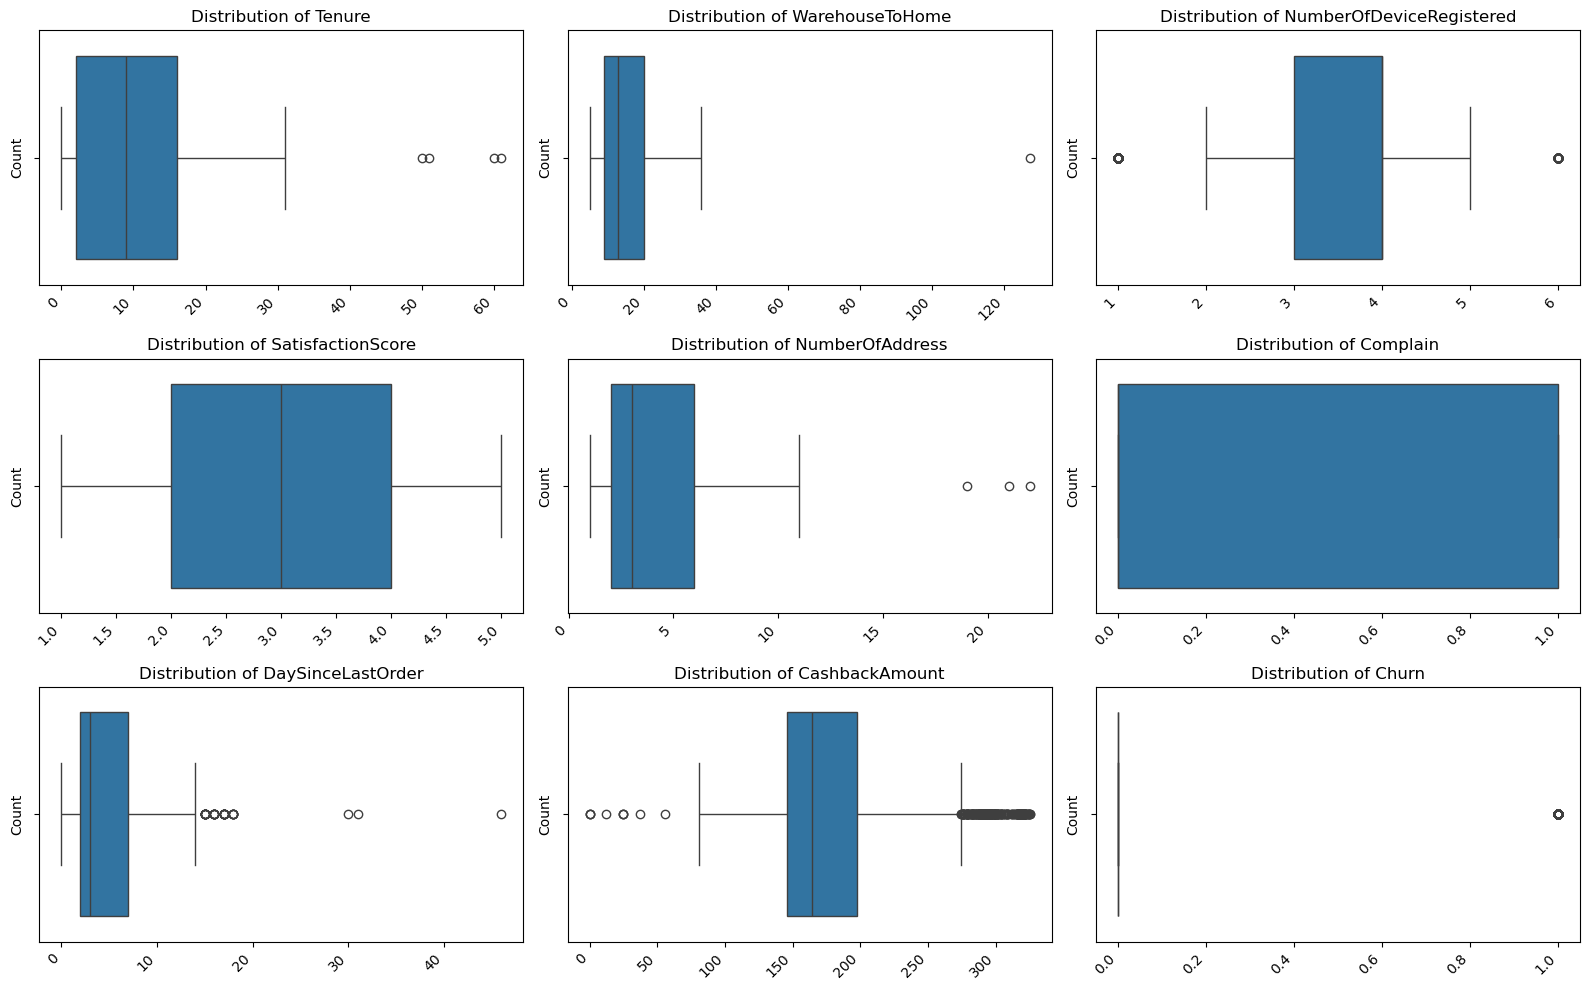

In [79]:
plt.figure(figsize=(16, 10))

for i, col in enumerate(df.select_dtypes(include=['number']).columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(df, x=col)
    plt.title(f'Distribution of {col}', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(fontsize=10)
    plt.xlabel('')
    plt.ylabel('Count', fontsize=10)
plt.tight_layout()
plt.show()

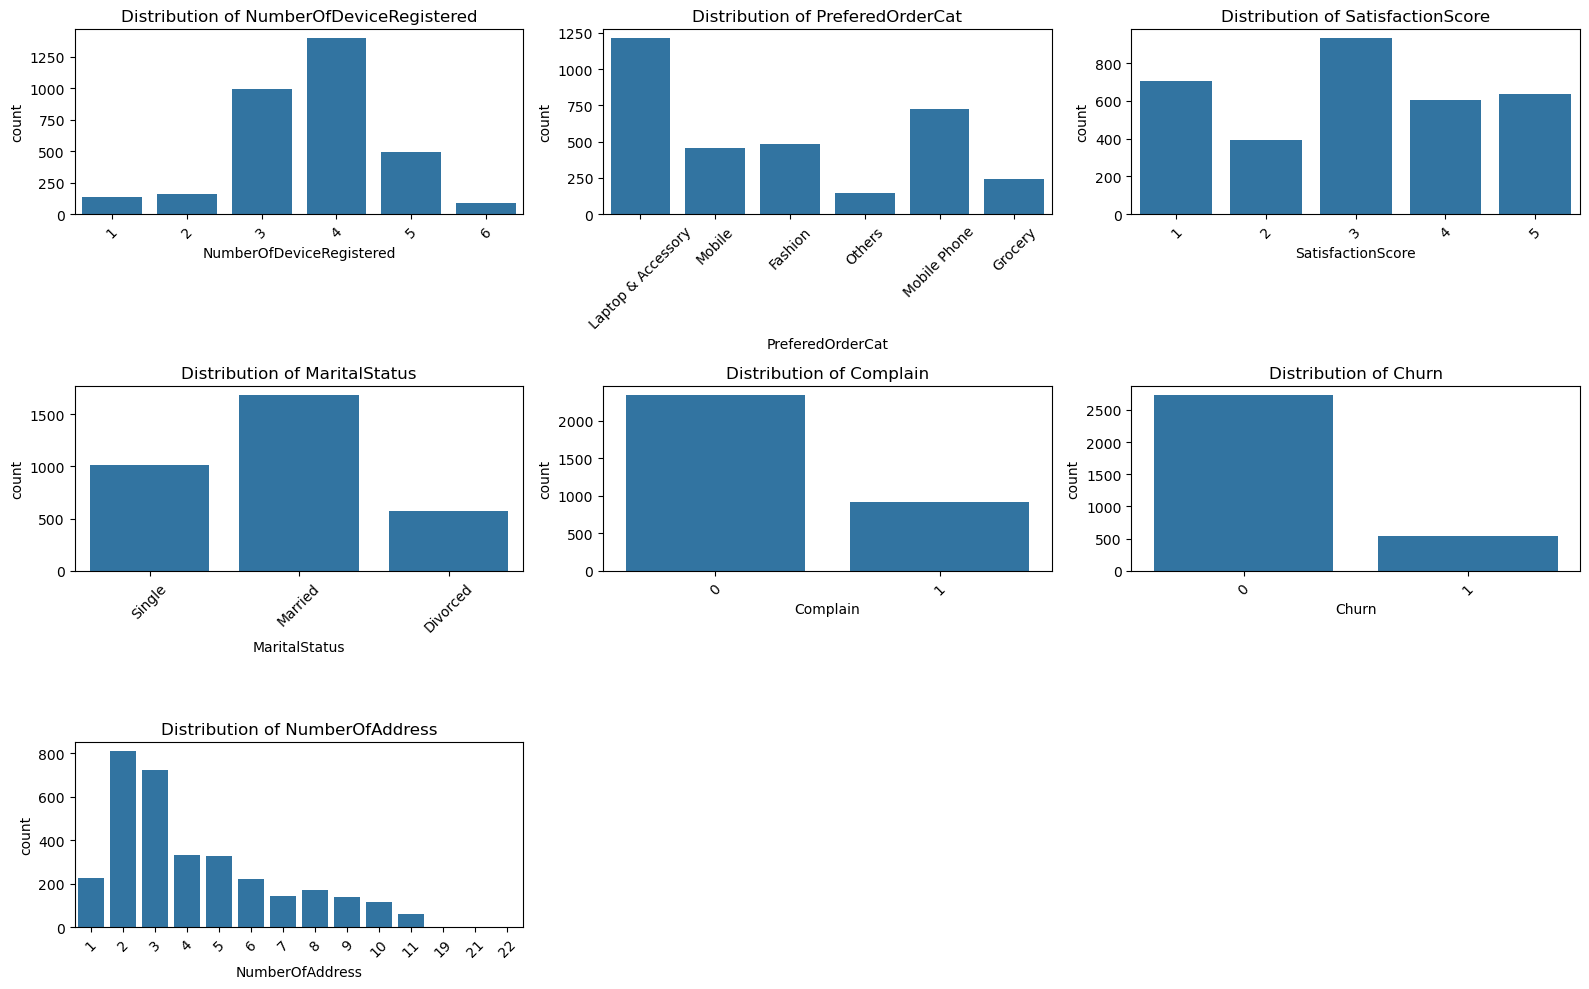

In [80]:
plt.figure(figsize=(16, 10))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

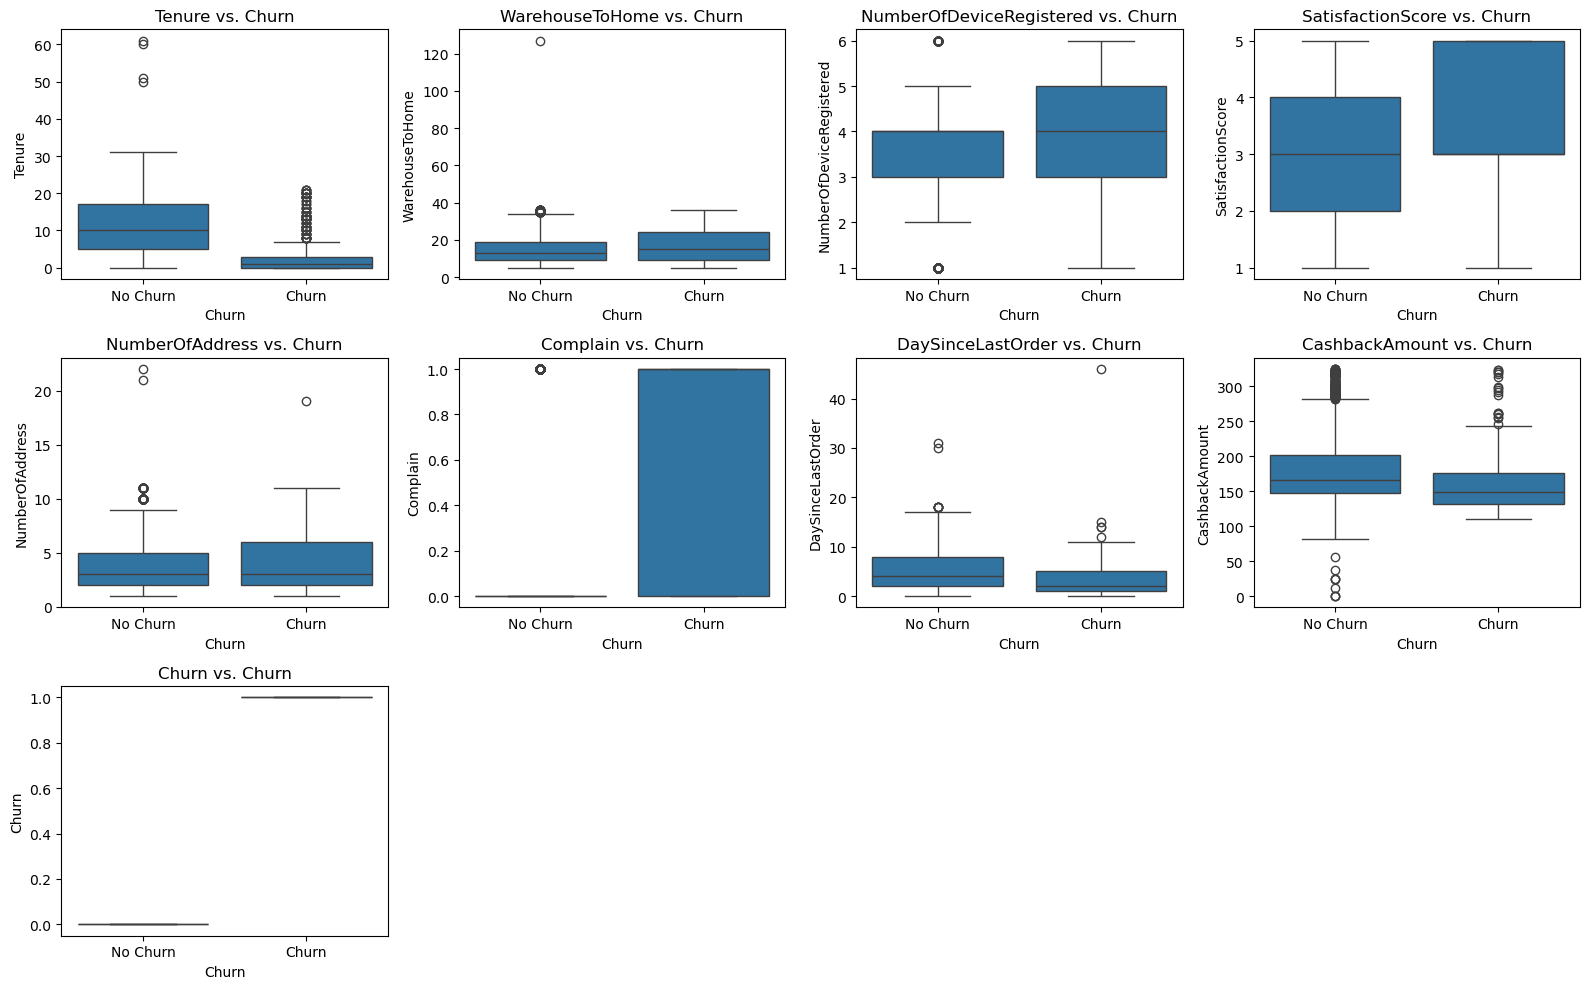

In [81]:
plt.figure(figsize=(16, 10))
for i, col in enumerate(df.select_dtypes(include=['number']).columns, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(data=df, x='Churn', y=col)
    plt.title(f'{col} vs. Churn', fontsize=12)
    plt.xticks([0, 1], ['No Churn', 'Churn'])
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

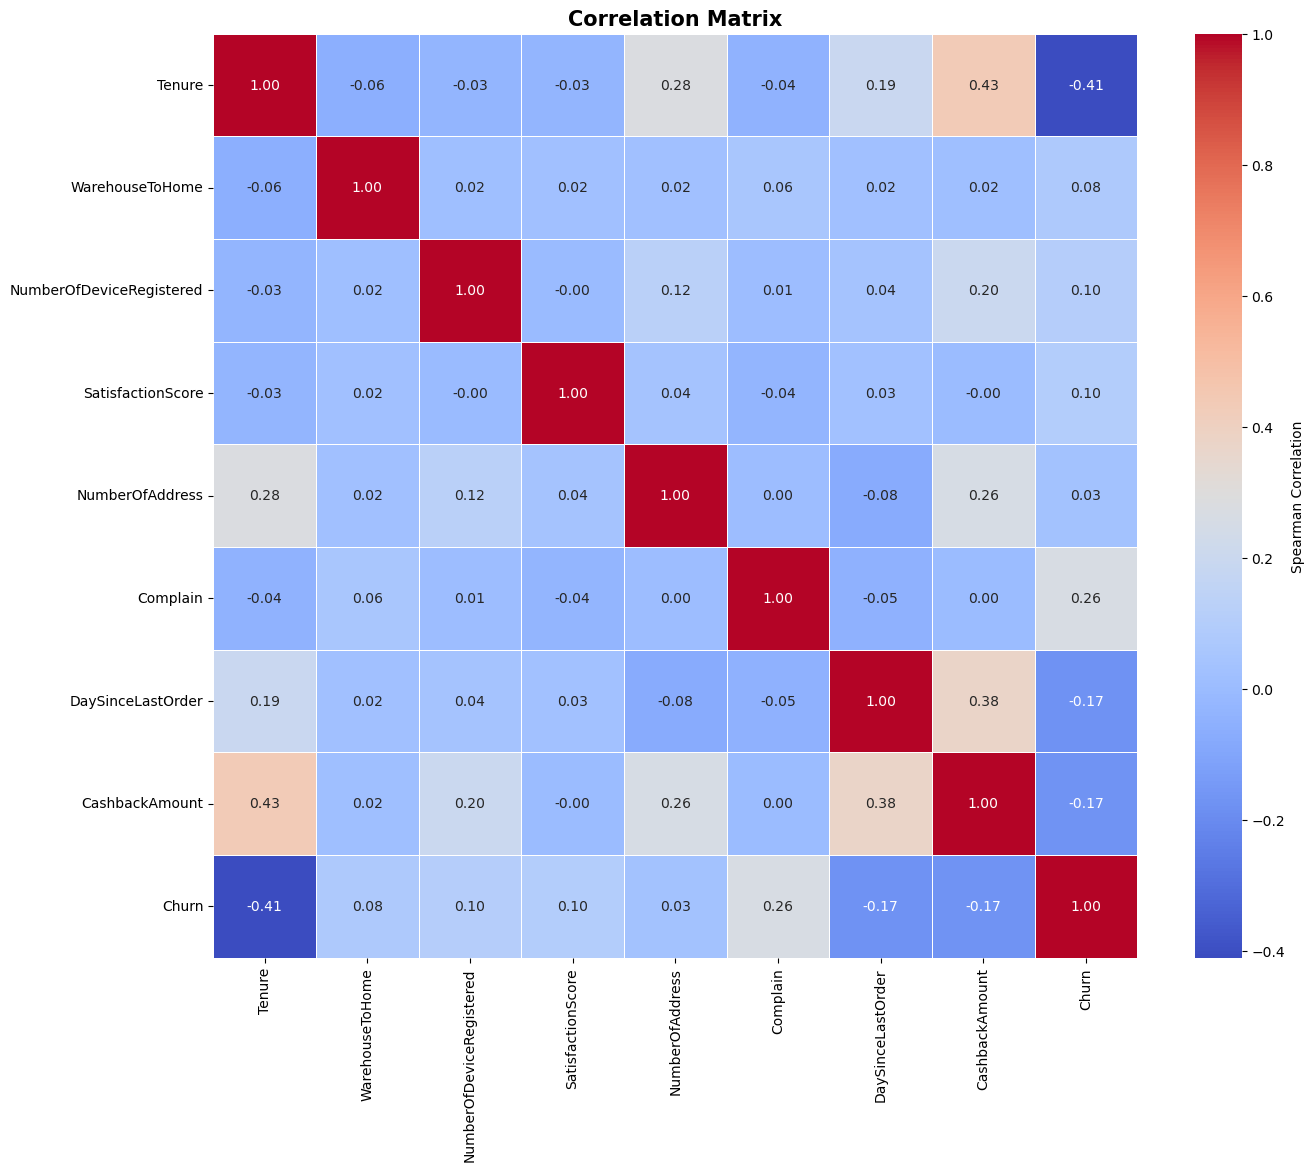

In [82]:
cols_corr= df.select_dtypes(include=['number'])

plt.figure(figsize=(15, 12))
corr = cols_corr.corr(method='spearman')
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=.5,
            cbar_kws={'label': 'Spearman Correlation'}, annot_kws={'size': 10}, xticklabels=corr.columns, yticklabels=corr.columns)

plt.title('Correlation Matrix', size=15, weight='bold')

> # **Data Splitting**

In [83]:
X = df.drop(columns=['MaritalStatus', 'PreferedOrderCat', 'Churn'])
X

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount
0,15.0,29.0,4,3,2,0,7.0,143.32
1,7.0,25.0,4,1,2,0,7.0,129.29
2,27.0,13.0,3,1,5,0,7.0,168.54
3,20.0,25.0,4,3,7,0,NaN,230.27
4,30.0,15.0,4,4,8,0,8.0,322.17
...,...,...,...,...,...,...,...,...
3933,25.0,15.0,5,4,7,0,8.0,249.90
3935,26.0,7.0,4,1,4,0,9.0,295.99
3936,28.0,9.0,5,3,8,0,1.0,231.86
3937,8.0,7.0,2,2,4,0,4.0,157.80


In [84]:
y = df['Churn']
y

0       0
1       0
2       0
3       0
4       0
       ..
3933    0
3935    0
3936    0
3937    0
3940    0
Name: Churn, Length: 3270, dtype: int64

In [85]:
y_df = pd.DataFrame(y)
y_df

,Churn
0,0
1,0
2,0
3,0
4,0
...,...
3933,0
3935,0
3936,0
3937,0


In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                test_size = 0.20,
                                                random_state = 42,
                                                stratify=y)

> # **Data Preprocessing**

In [87]:
encode_map = [{
        'col': 'SatisfactionScore', 
        'mapping': {
            '1': 1,
            '2': 2,
            '3': 3,
            '4': 4,
            '5': 5
        }}]

In [88]:
ordinal_scaler = Pipeline(
    [('ordinal',OrdinalEncoder(encode_map)),
    ('minmax', MinMaxScaler())]
)

In [89]:
transformers = ColumnTransformer([
    ('imputer', SimpleImputer(strategy='median'), ['Tenure', 'WarehouseToHome', 'DaySinceLastOrder']),
    ('ordinal', ordinal_scaler, ['SatisfactionScore']),
    ('standard', StandardScaler(), ['NumberOfDeviceRegistered', 'NumberOfAddress', 'CashbackAmount'])
    ],

     remainder='passthrough'
)

transformers

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer', SimpleImputer(strategy='median'),
                                 ['Tenure', 'WarehouseToHome',
                                  'DaySinceLastOrder']),
                                ('ordinal',
                                 Pipeline(steps=[('ordinal',
                                                  OrdinalEncoder(verbose=[{'col': 'SatisfactionScore',
                                                                           'mapping': {'1': 1,
                                                                                       '2': 2,
                                                                                       '3': 3,
                                                                                       '4': 4,
                                                                                       '5': 5}}])),
                                                 ('minmax', MinMaxScaler())]),
                                 ['SatisfactionScore']),
                                ('standard', StandardScaler(),
                                 ['NumberOfDeviceRegistered', 'NumberOfAddress',
                                  'CashbackAmount'])])

In [90]:
smote = SMOTE(random_state=42)
nearmiss = NearMiss()
rus = RandomUnderSampler(random_state=42)
ros = RandomOverSampler(random_state=42)

In [91]:
X_train_transformed = transformers.fit_transform(X_train)
X_test_transformed = transformers.transform(X_test)

In [92]:
feature_names_out = transformers.get_feature_names_out()
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=feature_names_out)
X_train_transformed_df

,imputer__Tenure,imputer__WarehouseToHome,imputer__DaySinceLastOrder,ordinal__SatisfactionScore,standard__NumberOfDeviceRegistered,standard__NumberOfAddress,standard__CashbackAmount,remainder__Complain
0,8.0,7.0,3.0,0.75,1.304438,1.066221,-0.409458,0.0
1,22.0,14.0,3.0,0.75,0.308986,1.066221,1.061797,0.0
2,10.0,16.0,3.0,1.00,-0.686466,1.066221,-0.879793,0.0
3,8.0,12.0,9.0,1.00,1.304438,-0.088741,1.264832,0.0
4,15.0,6.0,6.0,0.50,-0.686466,-0.858716,-0.587591,0.0
...,...,...,...,...,...,...,...,...
2611,6.0,16.0,8.0,0.00,2.299890,-0.858716,-0.133522,0.0
2612,9.0,17.0,2.0,0.75,-0.686466,-0.858716,-1.122391,0.0
2613,1.0,23.0,1.0,0.50,0.308986,-0.088741,0.567965,0.0
2614,1.0,33.0,4.0,0.50,1.304438,-0.473729,-0.505854,1.0


In [93]:
X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=feature_names_out)
X_test_transformed_df

,imputer__Tenure,imputer__WarehouseToHome,imputer__DaySinceLastOrder,ordinal__SatisfactionScore,standard__NumberOfDeviceRegistered,standard__NumberOfAddress,standard__CashbackAmount,remainder__Complain
0,18.0,14.0,11.0,0.00,0.308986,-0.858716,2.754562,1.0
1,18.0,11.0,14.0,1.00,-1.681919,-0.473729,2.782879,0.0
2,10.0,9.0,10.0,0.50,0.308986,0.681233,-0.565098,0.0
3,18.0,27.0,4.0,0.75,0.308986,-0.473729,-0.384153,0.0
4,1.0,12.0,4.0,0.50,-1.681919,0.296246,-0.582570,1.0
...,...,...,...,...,...,...,...,...
649,16.0,15.0,7.0,0.50,-0.686466,-0.088741,-0.432553,1.0
650,15.0,10.0,15.0,0.25,-0.686466,-0.858716,2.289248,0.0
651,11.0,24.0,0.0,0.00,1.304438,-0.088741,-0.406043,1.0
652,8.0,13.0,0.0,0.50,-0.686466,-0.858716,-1.090259,0.0


> # **Cross Validation**

In [94]:
get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'd2_absolute_error_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_max_error',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'neg_root_mean_squared_log_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 're

In [95]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42, class_weight='balanced'),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    'Random Forest': RandomForestClassifier(random_state=42, class_weight='balanced'),
    'AdaBoost': AdaBoostClassifier(RandomForestClassifier(random_state=42, class_weight='balanced'), random_state=42),
    'Gradient Boost': GradientBoostingClassifier(random_state=42),
    'XGB': XGBClassifier(random_state=42, verbosity=0, class_weight='balanced')
}

In [96]:
metrics = {
    'Accuracy': 'accuracy',
    'Precision': 'precision',
    'Recall': 'recall',
    'F1': 'f1',
    'ROC-AUC': 'roc_auc',
}

In [97]:
results = []
for name, model in models.items():
    pipeline = Pipeline([
        ('transformers', transformers),
        ('model', model)
    ])
    
    scores = cross_validate(
        pipeline, 
        X_train, 
        y_train,
        cv=5,
        scoring=metrics,
        n_jobs=-1
    )
    
    results.append({
        'Model': name,
        'Accuracy': scores['test_Accuracy'].mean(),
        'Precision': scores['test_Precision'].mean(),
        'Recall': scores['test_Recall'].mean(),
        'F1': scores['test_F1'].mean(),
        'ROC-AUC': scores['test_ROC-AUC'].mean()
    })

df_score = pd.DataFrame(results)
df_score

,Model,Accuracy,Precision,Recall,F1,ROC-AUC
0,Logistic Regression,0.753434,0.379114,0.793871,0.512896,0.842983
1,KNN,0.868886,0.641804,0.451819,0.527767,0.846911
2,Decision Tree,0.881499,0.648286,0.601970,0.623752,0.769007
3,Random Forest,0.904820,0.807712,0.548044,0.652177,0.924368
4,AdaBoost,0.904055,0.798958,0.552695,0.651453,0.762642
5,Gradient Boost,0.892972,0.748903,0.519863,0.610826,0.899558
6,XGB,0.902524,0.741142,0.625280,0.676550,0.924284


> # **Model Fitting**

In [124]:
benchmark_model = {
    'Random Forest': RandomForestClassifier(random_state=42, class_weight='balanced'),
    'XGB': XGBClassifier(random_state=42, verbosity=0, class_weight='balanced')
}

benchmark_results = []

for name, model in benchmark_model.items():
    model_pipeline = Pipeline([
        ('transformers', transformers),
        ('model', model)
    ])
    
    model_pipeline.fit(X_train, y_train)
    y_pred = model_pipeline.predict(X_test)
    y_proba = model_pipeline.predict_proba(X_test)[:, 1]

    benchmark_results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_proba)
    })

df_benchmark_results = pd.DataFrame(benchmark_results)
df_benchmark_results

,Model,Accuracy,Precision,Recall,F1,ROC-AUC
0,Random Forest,0.928135,0.840909,0.691589,0.758974,0.960182
1,XGB,0.932722,0.800000,0.785047,0.792453,0.950964


> # **Hyperparameter Tuning**

In [125]:
estimator = Pipeline([
    ('transformer', transformers),
    ('resampler', rus), 
    ('model', XGBClassifier(random_state=42, verbosity=0, class_weight='balanced'))
    ])

hyperparam_space = {
    'resampler':[smote, rus, ros, None],
    'model__n_estimators': [100, 200, 300],
    'model__learning_rate': [0.05, 0.1, 0.2],
    'model__max_depth': [3, 5, 7],
    'model__gamma': [0, 0.1, 0.2],
    'model__subsample': [0.8, 0.9, 1.0],
    'model__colsample_bytree': [0.8, 0.9, 1.0],
}

metrics = {
    'Accuracy': 'accuracy',
    'Precision': 'precision',
    'Recall': 'recall',
    'F1': 'f1',
    'ROC-AUC': 'roc_auc'
}

In [100]:
# Remove the following comment markers to enable Grid Search:

# grid_search = GridSearchCV(
#     estimator = xgb_model,
#     param_grid = param_dist,
#     cv = 5,
#     scoring = 'neg_root_mean_squared_error',
#     n_jobs = -1,
#     verbose = 1
# )

In [101]:
# Remove the following comment markers to enable Grid Search:

#grid_search.fit(X_train,y_train)
#print(f"Best Parameters: {grid_search.best_params_}")
#print(f"Best RMSE: {-grid_search.best_score_}")

In [126]:
random_search = RandomizedSearchCV(
    estimator, 
    param_distributions = hyperparam_space, 
    cv = 5, 
    scoring = metrics, 
    n_jobs = -1, 
    refit='F1',
    random_state=42,
    n_iter=100
)

In [127]:
random_search.fit(X_train,y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning:

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is dep

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/anacond

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.valid

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning:

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.valid

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is dep

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning:

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.valid

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is dep

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/anacond

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is dep

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is dep

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is dep

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is dep

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning:

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is dep

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is dep

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/anacond

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning:

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
/opt/anacond

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is dep

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning:

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is dep

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning:

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is dep

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
/opt/anacond

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored a

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('imputer',
                                                                               SimpleImputer(strategy='median'),
                                                                               ['Tenure',
                                                                                'WarehouseToHome',
                                                                                'DaySinceLastOrder']),
                                                                              ('ordinal',
                                                                               Pipeline(steps=[('ordinal',
                                                                                                OrdinalEncoder(verbose=[{'col': 'SatisfactionScore',
                                                                                                                         'mapping': {'1': 1,
                                                                                                                                     '2': 2,
                                                                                                                                     '3': 3,
                                                                                                                                     '4': 4,
                                                                                                                                     '5': 5}}])),...
                                        'model__learning_rate': [0.05, 0.1,
                                                                 0.2],
                                        'model__max_depth': [3, 5, 7],
                                        'model__n_estimators': [100, 200, 300],
                                        'model__subsample': [0.8, 0.9, 1.0],
                                        'resampler': [SMOTE(random_state=42),
                                                      RandomUnderSampler(random_state=42),
                                                      RandomOverSampler(random_state=42),
                                                      None]},
                   random_state=42, refit='F1',
                   scoring={'Accuracy': 'accuracy', 'F1': 'f1',
                            'Precision': 'precision', 'ROC-AUC': 'roc_auc',
                            'Recall': 'recall'})

In [128]:
print(f"Best Parameters: {random_search.best_params_}")

Best Parameters: {'resampler': RandomOverSampler(random_state=42), 'model__subsample': 0.8, 'model__n_estimators': 200, 'model__max_depth': 5, 'model__learning_rate': 0.1, 'model__gamma': 0, 'model__colsample_bytree': 1.0}


In [129]:
print(f"Best ROC-AUC: {random_search.best_score_}")

Best ROC-AUC: 0.7029298465712175


> ## **Final Model Training**

**Before Tuning**

In [130]:
default_model = estimator
default_model.fit(X_train,y_train)
y_pred_train_default = default_model.predict(X_train)
y_pred_test_default = default_model.predict(X_test)
y_proba_test_default = default_model.predict_proba(X_test)[:, 1]

Accuracy = accuracy_score(y_test, y_pred_test_default)
Precision = precision_score(y_test, y_pred_test_default)
Recall = recall_score(y_test, y_pred_test_default)
F1 = f1_score(y_test, y_pred_test_default)
ROC_AUC = roc_auc_score(y_test, y_proba_test_default)

print(f"Accuracy: {Accuracy:.5f}")
print(f"Precision: {Precision:.5f}")
print(f"Recall: {Recall:.5f}")
print(f"F1: {F1:.5f}")
print(f"ROC_AUC: {ROC_AUC:.5f}")

Accuracy: 0.83792
Precision: 0.50256
Recall: 0.91589
F1: 0.64901
ROC_AUC: 0.92462


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


**After Tuning**

In [132]:
best_model = random_search.best_estimator_
best_model.fit(X_train,y_train)
y_pred_train_best_model = best_model.predict(X_train)
y_pred_test_best_model = best_model.predict(X_test)
y_proba_test_best_model = best_model.predict_proba(X_test)[:, 1]

Accuracy = accuracy_score(y_test, y_pred_test_best_model)
Precision = precision_score(y_test, y_pred_test_best_model)
Recall = recall_score(y_test, y_pred_test_best_model)
F1 = f1_score(y_test, y_pred_test_best_model)
ROC_AUC = roc_auc_score(y_test, y_proba_test_best_model)

print(f"Accuracy: {Accuracy:.5f}")
print(f"Precision: {Precision:.5f}")
print(f"Recall: {Recall:.5f}")
print(f"F1: {F1:.5f}")
print(f"ROC_AUC: {ROC_AUC:.5f}")

Accuracy: 0.90520
Precision: 0.66187
Recall: 0.85981
F1: 0.74797
ROC_AUC: 0.94657


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


> ## **Feature Importance**

In [133]:
X_test_transformed_df

,imputer__Tenure,imputer__WarehouseToHome,imputer__DaySinceLastOrder,ordinal__SatisfactionScore,standard__NumberOfDeviceRegistered,standard__NumberOfAddress,standard__CashbackAmount,remainder__Complain
0,18.0,14.0,11.0,0.00,0.308986,-0.858716,2.754562,1.0
1,18.0,11.0,14.0,1.00,-1.681919,-0.473729,2.782879,0.0
2,10.0,9.0,10.0,0.50,0.308986,0.681233,-0.565098,0.0
3,18.0,27.0,4.0,0.75,0.308986,-0.473729,-0.384153,0.0
4,1.0,12.0,4.0,0.50,-1.681919,0.296246,-0.582570,1.0
...,...,...,...,...,...,...,...,...
649,16.0,15.0,7.0,0.50,-0.686466,-0.088741,-0.432553,1.0
650,15.0,10.0,15.0,0.25,-0.686466,-0.858716,2.289248,0.0
651,11.0,24.0,0.0,0.00,1.304438,-0.088741,-0.406043,1.0
652,8.0,13.0,0.0,0.50,-0.686466,-0.858716,-1.090259,0.0


In [134]:
model = best_model.named_steps['model']
importance = model.feature_importances_ 

feature_names = X_test_transformed_df.columns
cleaned_feature_names = [name.split('__')[-1] for name in X_test_transformed_df.columns]

feature_importance = pd.DataFrame({
    'Feature': cleaned_feature_names,
    'Importance': importance
}).sort_values('Importance', ascending=False)
feature_importance

,Feature,Importance
0,Tenure,0.315308
7,Complain,0.189345
6,CashbackAmount,0.092808
3,SatisfactionScore,0.090020
5,NumberOfAddress,0.089788
2,DaySinceLastOrder,0.088500
4,NumberOfDeviceRegistered,0.071568
1,WarehouseToHome,0.062663


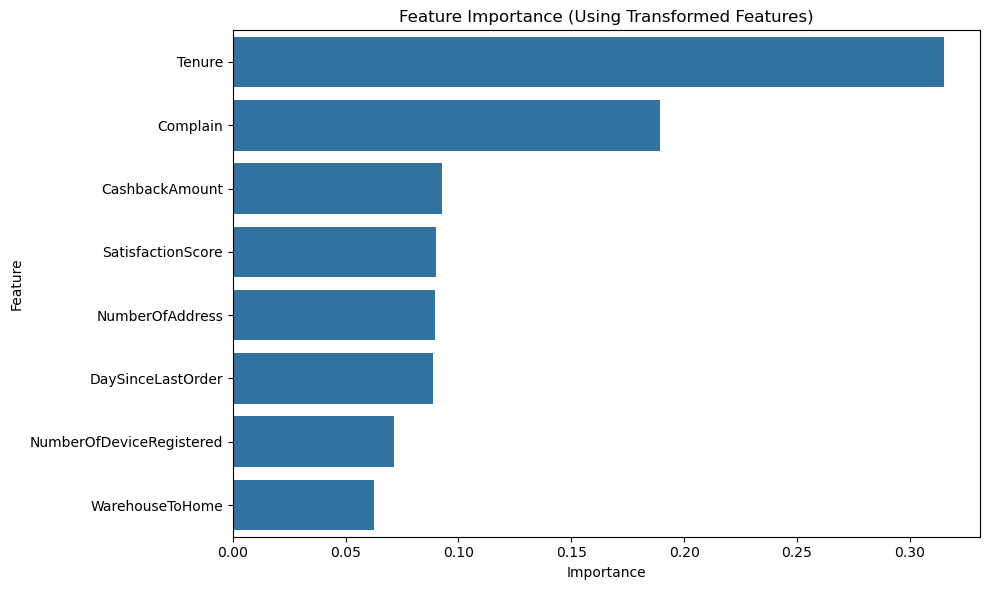

In [135]:
plt.figure(figsize=(10, 6))
sns.barplot(feature_importance, x='Importance', y='Feature')
plt.title('Feature Importance (Using Transformed Features)')
plt.tight_layout()
plt.show()

> ## **Model Interpretation**

In [136]:
y_pred_train = best_model.predict(X_train)
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

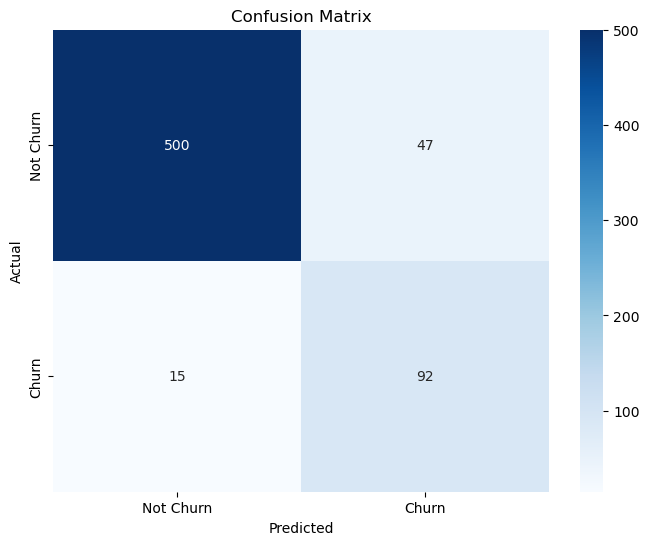

In [137]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Churn', 'Churn'],
            yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

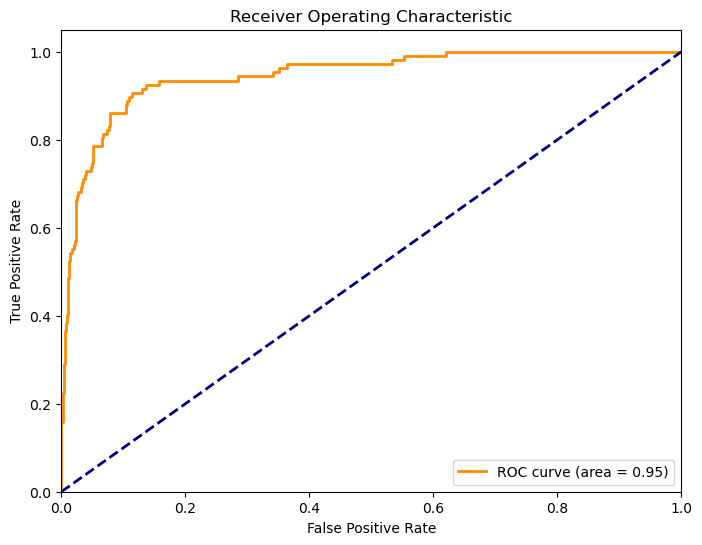

In [138]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

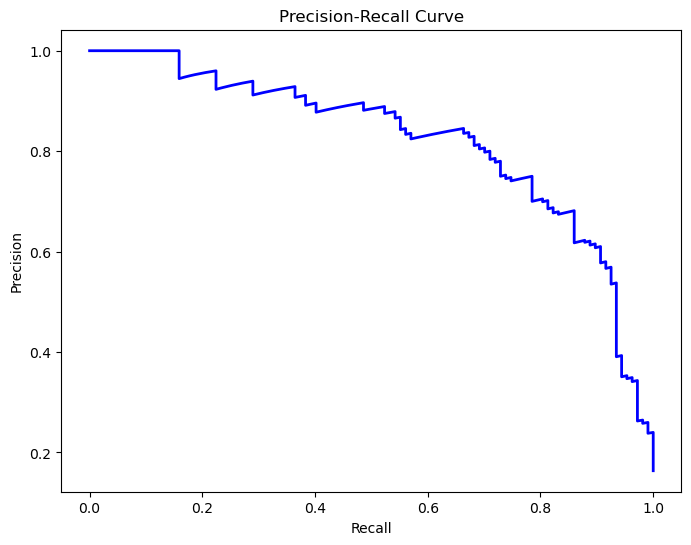

In [139]:
precision, recall, _ = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

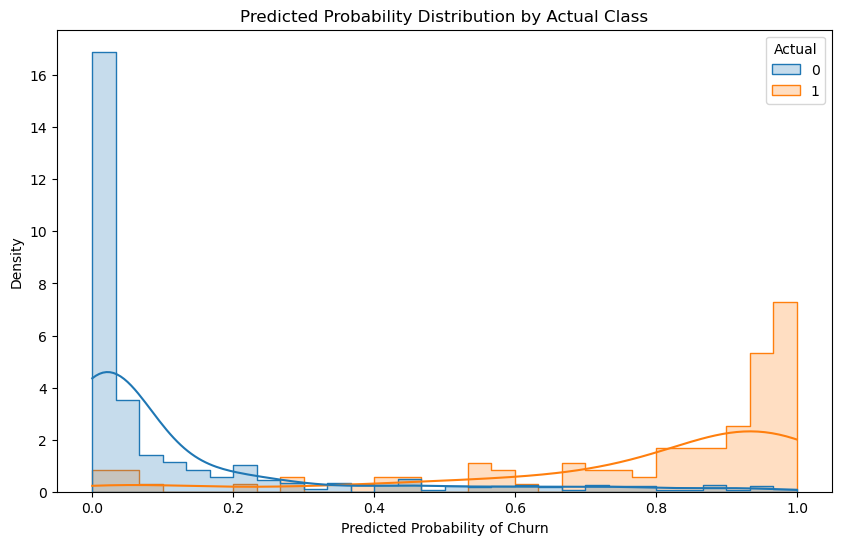

In [140]:
plt.figure(figsize=(10, 6))
sns.histplot(data=pd.DataFrame({'Probability': y_proba, 'Actual': y_test}),
             x='Probability', hue='Actual', bins=30, kde=True,
             element='step', stat='density', common_norm=False)
plt.title('Predicted Probability Distribution by Actual Class')
plt.xlabel('Predicted Probability of Churn')
plt.ylabel('Density')
plt.show()

> ## **SHAP**

In [116]:
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(X_test_transformed_df)

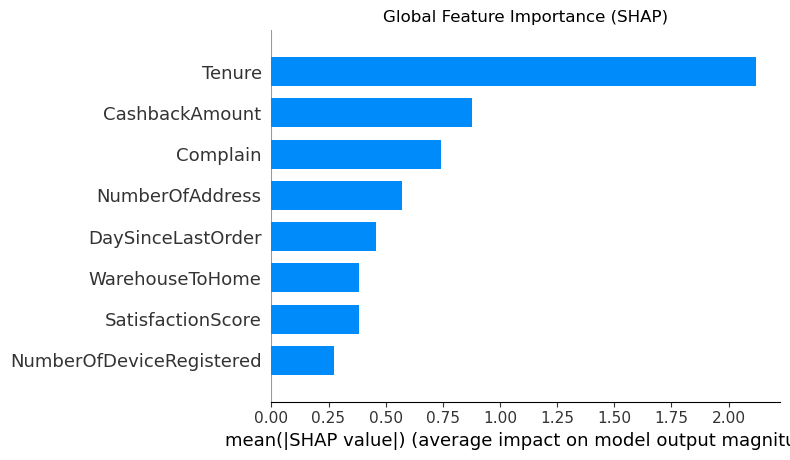

In [117]:
shap.summary_plot(shap_values, X_test_transformed_df, plot_type="bar", 
                 feature_names=cleaned_feature_names, show=False)
plt.title("Global Feature Importance (SHAP)")
plt.tight_layout()
plt.show()

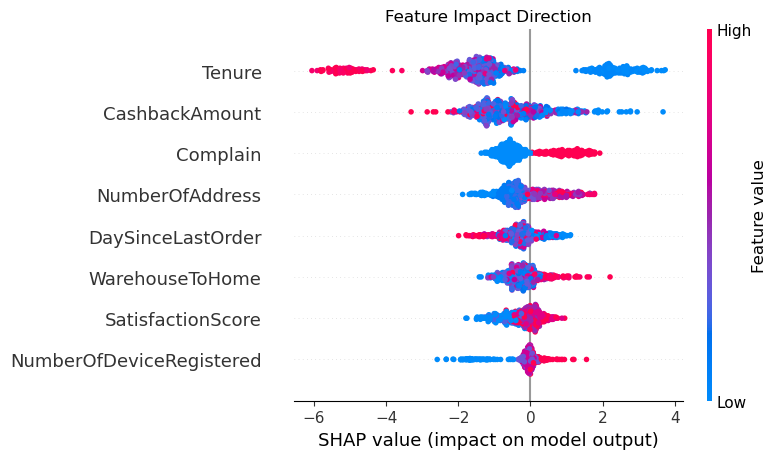

In [118]:
shap.summary_plot(shap_values, X_test_transformed_df, 
                 feature_names=cleaned_feature_names, show=False)
plt.title("Feature Impact Direction")
plt.tight_layout()
plt.show()

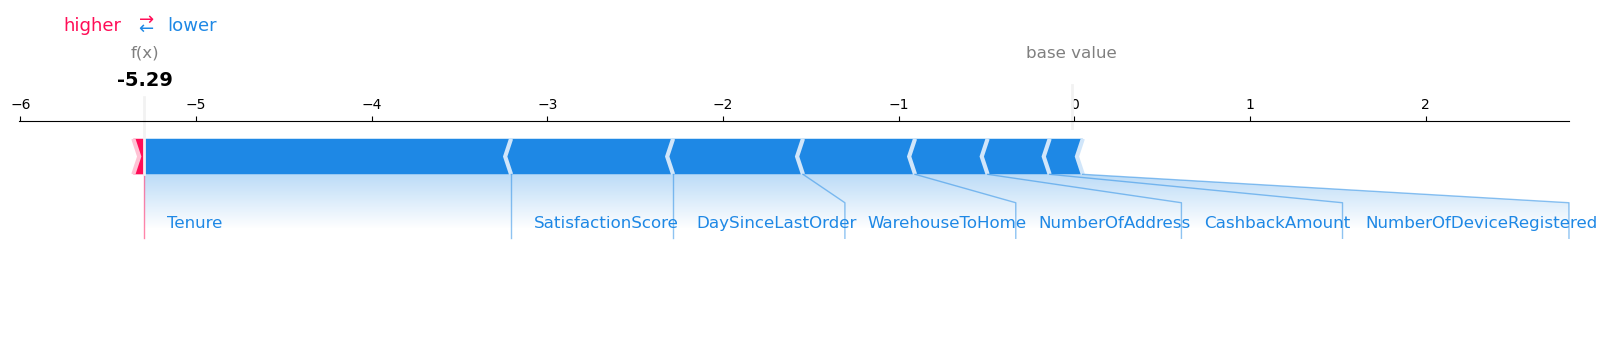

<Figure size 640x480 with 0 Axes>

In [119]:
shap.initjs()
shap.force_plot(explainer.expected_value, 
                shap_values[0,:], 
                features=cleaned_feature_names,
                matplotlib=True)
plt.tight_layout()
plt.show()

> ## **Partial Dependence Display**

In [120]:
# def plot_pdps(model, X_transformed, feature_names, features_to_plot=None, n_cols=3):

#     if features_to_plot is None:
#         features_to_plot = feature_names
    
#     # Convert feature names to column indices
#     feature_indices = [feature_names.index(f) for f in features_to_plot]
    
#     # Create PDPs
#     fig, ax = plt.subplots(figsize=(15, 25))
#     PartialDependenceDisplay.from_estimator(
#         model,
#         X_transformed,
#         features=feature_indices,
#         feature_names=feature_names,
#         kind='both',  # Shows both PDP line and ICE lines
#         n_cols=n_cols,
#         ax=ax,
#         random_state=42
#     )
#     plt.suptitle("Partial Dependence Plots", y=1.02, fontsize=14)
#     plt.tight_layout()
#     plt.show()

# # Example usage with your data
# plot_pdps(
#     best_model.named_steps['model'],
#     X_test_transformed_df,
#     cleaned_feature_names,
#     features_to_plot=['Size(sqf)', 'YearBuilt', 'N_FacilitiesInApt', 'N_Parkinglot(Basement)', 
#                      'N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)'],
#     n_cols=2
# )

> ## **Saving Final Model**

In [121]:
# final_model = gradient_model

In [122]:
# final_model.fit(X_train, y_train)
# test_score = final_model.score(X_test, y_test)

# final_model.fit(X, y)
# joblib.dump(final_model, 'final_model.pkl')

In [123]:
# import pickle

# pickle.dump(final_model, open('final_model.sav','wb'))

> ## **Conclusions**

> **Model Performance Evaluation**

> **Business Interpretation**

> **Limitations & Recommendations**
